In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms as T
from torch.utils.data import DataLoader
import torchvision.models as  models

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
resnet18 = models.resnet18(pretrained=True)
resnet50 = models.resnet50(pretrained=True)
resnet152 = models.resnet152(pretrained=True)

resnet_models = [resnet18, resnet50]
models_names = ["ResNet 18", "ResNet 50"]

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 56.1MB/s]
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed 

In [4]:
resnet152

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [6]:
from torchsummary import summary

for i, model in enumerate(resnet_models):
  model.to(device)
  print(models_names[i])
  summary(model, (3, 224, 224), 64)

ResNet 18
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [64, 64, 112, 112]           9,408
       BatchNorm2d-2         [64, 64, 112, 112]             128
              ReLU-3         [64, 64, 112, 112]               0
         MaxPool2d-4           [64, 64, 56, 56]               0
            Conv2d-5           [64, 64, 56, 56]          36,864
       BatchNorm2d-6           [64, 64, 56, 56]             128
              ReLU-7           [64, 64, 56, 56]               0
            Conv2d-8           [64, 64, 56, 56]          36,864
       BatchNorm2d-9           [64, 64, 56, 56]             128
             ReLU-10           [64, 64, 56, 56]               0
       BasicBlock-11           [64, 64, 56, 56]               0
           Conv2d-12           [64, 64, 56, 56]          36,864
      BatchNorm2d-13           [64, 64, 56, 56]             128
             ReLU-14         

In [7]:
resnet18


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [9]:
resnet18.layer4[1]

BasicBlock(
  (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [12]:
resnet18.fc = nn.Linear(512, 10)

In [16]:
resnet50.fc = nn.Linear(2048, 10)

In [21]:
for name, param in resnet18.named_parameters():
  if "layer4" in name or "fc" in name:
    param.requires_grad = True
  else:
    param.requires_grad = False


In [23]:
for name, param in resnet50.named_parameters():
  if "layer4.1" in name or "fc" in name:
    param.requires_grad = True
  else:
    param.requires_grad = False

In [26]:
!pip install torchinfo

from torchinfo import summary
summary(resnet18, input_size=[1, 3, 224, 224])
summary(resnet50, input_size=[1, 3, 224, 224])

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [1, 10]                   --
├─Conv2d: 1-1                            [1, 64, 112, 112]         (9,408)
├─BatchNorm2d: 1-2                       [1, 64, 112, 112]         (128)
├─ReLU: 1-3                              [1, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [1, 64, 56, 56]           --
├─Sequential: 1-5                        [1, 256, 56, 56]          --
│    └─Bottleneck: 2-1                   [1, 256, 56, 56]          --
│    │    └─Conv2d: 3-1                  [1, 64, 56, 56]           (4,096)
│    │    └─BatchNorm2d: 3-2             [1, 64, 56, 56]           (128)
│    │    └─ReLU: 3-3                    [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-4                  [1, 64, 56, 56]           (36,864)
│    │    └─BatchNorm2d: 3-5             [1, 64, 56, 56]           (128)
│    │    └─ReLU: 3-6                    [1, 64, 56, 56]    

In [27]:
transforms = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [29]:
train_dataset = datasets.CIFAR10(
    root="./data",
    train=True,
    download=True,
    transform=transforms
)
test_dataset = datasets.CIFAR10(
    root="./data",
    train=False,
    download=True,
    transform=transforms
)
train_dataloader = DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True
)
test_dataloader = DataLoader(
    test_dataset,
    batch_size=64,
    shuffle=True
)

Files already downloaded and verified
Files already downloaded and verified


In [34]:
resnet18 = resnet18.to(device)
from tqdm import tqdm

def train(model: torch.nn.Module, loss_fn: torch.nn.Module, optimizer: torch.optim.Optimizer, epochs: int = 5):
  model.train()

  model = model.to(device)
  train_loss, train_acc = 0, 0
  for epoch in tqdm(range(epochs)):
    for i, (images, labels) in enumerate(train_dataloader):
      images, labels = images.to(device), labels.to(device)
      outputs = model(images)

      loss = loss_fn(outputs, labels)
      train_loss += loss.item()

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      _, predicted = torch.max(outputs, 1)
      train_acc += (predicted == labels).sum().item()/len(outputs)
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
    print(f"Epoch: {epoch+1}: Train Accuracy: {train_acc}, Train Loss: {train_loss}")

In [32]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet18.parameters(), lr=0.001)

In [35]:
train(resnet18, loss_fn=loss_fn, optimizer=optimizer)

 20%|██        | 1/5 [02:53<11:34, 173.74s/it]

Epoch: 1: Train Accuracy: 0.8476462595907929, Train Loss: 0.44496954684062384


 40%|████      | 2/5 [05:49<08:44, 174.68s/it]

Epoch: 2: Train Accuracy: 0.9261558775698091, Train Loss: 0.2201497369763238


 60%|██████    | 3/5 [08:28<05:35, 167.93s/it]

Epoch: 3: Train Accuracy: 0.9595842786158182, Train Loss: 0.12031116158434002


 80%|████████  | 4/5 [11:14<02:47, 167.13s/it]

Epoch: 4: Train Accuracy: 0.9735736371849307, Train Loss: 0.08101275477531832


100%|██████████| 5/5 [14:02<00:00, 168.54s/it]

Epoch: 5: Train Accuracy: 0.9795657910961444, Train Loss: 0.06162086015194382


In [36]:
def test(model: torch.nn.Module, loss_fn: torch.nn.Module):
  model.eval()
  test_acc, test_loss = 0, 0
  with torch.inference_mode():
    for images, labels in test_dataloader:
      images, labels = images.to(device), labels.to(device)

      outputs = model(images)

      loss = loss_fn(outputs, labels)

      test_loss += loss.item()

      _, predicted = torch.max(outputs, 1)
      test_acc += (predicted == labels).sum().item()/len(outputs)

    test_acc /= len(test_dataloader)
    test_loss /= len(test_dataloader)
    print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

In [37]:
test(resnet18, loss_fn)


Test Loss: 0.427646612546816, Test Accuracy: 0.8922173566878981


In [38]:
optimizer_50 = torch.optim.Adam(resnet50.parameters(), lr=0.001)

In [39]:
train(resnet50, loss_fn=loss_fn, optimizer=optimizer_50)

 20%|██        | 1/5 [04:32<18:08, 272.01s/it]

Epoch: 1: Train Accuracy: 0.8440297314578005, Train Loss: 0.4637909672601753


 40%|████      | 2/5 [09:15<13:55, 278.59s/it]

Epoch: 2: Train Accuracy: 0.90688974390212, Train Loss: 0.2765505190147214


 60%|██████    | 3/5 [13:50<09:13, 276.98s/it]

Epoch: 3: Train Accuracy: 0.9381801659129184, Train Loss: 0.1837416005179303


 80%|████████  | 4/5 [18:13<04:31, 271.37s/it]

Epoch: 4: Train Accuracy: 0.9566624746367172, Train Loss: 0.12690270565903325


100%|██████████| 5/5 [22:35<00:00, 271.18s/it]

Epoch: 5: Train Accuracy: 0.9715718190212745, Train Loss: 0.0837204957196828


In [41]:
test(resnet50, loss_fn)

Test Loss: 0.374491559258502, Test Accuracy: 0.9038614649681529


In [40]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck']

In [81]:
custom_path = "/content/360_F_97589769_t45CqXyzjz0KXwoBZT9PRaWGHRk5hQqQ.jpg"
custom_image_uint8 = torchvision.io.read_image(str(custom_path))
custom_image = custom_image_uint8/255

custom_image_transforms=T.Compose([
    T.Resize((224, 224)),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
custom_image_transformed = custom_image_transforms(custom_image)
# Add Batch size
final_image = custom_image_transformed.unsqueeze(dim=0).to(device)

resnet18.eval()
with torch.inference_mode():
  output = resnet18(final_image)
  _, predicted = torch.max(output, 1)
  label = torch.argmax(torch.softmax(output, dim=1), dim=1)
print(label.shape)

torch.Size([1])


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


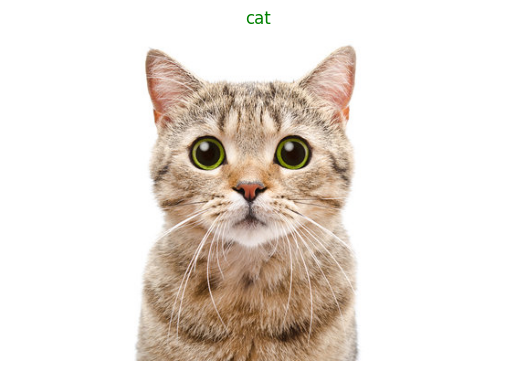

In [82]:
import matplotlib.pyplot as plt

plt.imshow(custom_image.permute(1, 2, 0))
color = "green" if classes[predicted] == "cat" else "red"
plt.title(label="cat", color=color)
plt.axis(False)
plt.show()

In [72]:
custom_path = "/content/360_F_97589769_t45CqXyzjz0KXwoBZT9PRaWGHRk5hQqQ.jpg"
custom_image_uint8 = torchvision.io.read_image(str(custom_path))
custom_image = custom_image_uint8/255

custom_image_transforms=T.Compose([
    T.Resize((224, 224)),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
custom_image_transformed = custom_image_transforms(custom_image)
# Add Batch size
final_image = custom_image_transformed.unsqueeze(dim=0).to(device)

resnet50.eval()
with torch.inference_mode():
  output = resnet50(final_image)
  print(output)
  predicted = torch.argmax(torch.softmax(output, dim=1), dim=1)
  print(torch.softmax(output, dim=1))
  print(predicted)
  print(classes[predicted])

tensor([[ -6.2185,  -6.8876,  -1.6406,   4.2407, -10.9211,  -1.9063, -10.8873,
         -12.1796, -18.6989, -16.3572]], device='cuda:0')
tensor([[2.8539e-05, 1.4617e-05, 2.7773e-03, 9.9505e-01, 2.5891e-07, 2.1292e-03,
         2.6781e-07, 7.3548e-08, 1.0846e-10, 1.1280e-09]], device='cuda:0')
tensor([3], device='cuda:0')
cat


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


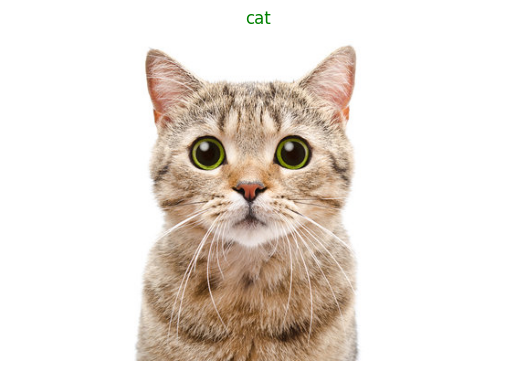

In [74]:
import matplotlib.pyplot as plt

plt.imshow(custom_image.permute(1, 2, 0))
color = "green" if classes[predicted] == "cat" else "red"
plt.title(label="cat", color=color)
plt.axis(False)
plt.show()

In [60]:
wide_resnet = models.wide_resnet50_2(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Wide_ResNet50_2_Weights.IMAGENET1K_V1`. You can also use `weights=Wide_ResNet50_2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth" to /root/.cache/torch/hub/checkpoints/wide_resnet50_2-95faca4d.pth
100%|██████████| 132M/132M [00:00<00:00, 146MB/s]


In [61]:
wide_resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), strid

In [62]:
wide_resnet.fc = nn.Linear(2048, 10)

In [64]:
for name, param in wide_resnet.named_parameters():
  if "layer4.2" in name or "fc" in name:
    param.requires_grad = True
  else:
    param.requires_grad = False

In [66]:
wide_resnet.to(device)
summary(wide_resnet, [1, 3, 224, 224])

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [1, 10]                   --
├─Conv2d: 1-1                            [1, 64, 112, 112]         (9,408)
├─BatchNorm2d: 1-2                       [1, 64, 112, 112]         (128)
├─ReLU: 1-3                              [1, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [1, 64, 56, 56]           --
├─Sequential: 1-5                        [1, 256, 56, 56]          --
│    └─Bottleneck: 2-1                   [1, 256, 56, 56]          --
│    │    └─Conv2d: 3-1                  [1, 128, 56, 56]          (8,192)
│    │    └─BatchNorm2d: 3-2             [1, 128, 56, 56]          (256)
│    │    └─ReLU: 3-3                    [1, 128, 56, 56]          --
│    │    └─Conv2d: 3-4                  [1, 128, 56, 56]          (147,456)
│    │    └─BatchNorm2d: 3-5             [1, 128, 56, 56]          (256)
│    │    └─ReLU: 3-6                    [1, 128, 56, 56]  

In [67]:
optimizer_wide = torch.optim.Adam(wide_resnet.parameters(), lr=0.001)

In [68]:
train(wide_resnet, loss_fn=loss_fn, optimizer=optimizer_wide, epochs=2)

 50%|█████     | 1/2 [06:38<06:38, 398.42s/it]

Epoch: 1: Train Accuracy: 0.8557584718670077, Train Loss: 0.42609407320199416


100%|██████████| 2/2 [13:12<00:00, 396.27s/it]

Epoch: 2: Train Accuracy: 0.9278446399895998, Train Loss: 0.21604576401450062


In [69]:
test(wide_resnet, loss_fn)

Test Loss: 0.315098145110592, Test Accuracy: 0.8982882165605095


In [83]:
wide_resnet.eval()
with torch.inference_mode():
  output = wide_resnet(final_image)
  print(output)
  predicted = torch.argmax(torch.softmax(output, dim=1), dim=1)
  print(torch.softmax(output, dim=1))
  print(predicted)
  print(classes[predicted])

tensor([[-5.6593, -3.2279,  0.5420,  4.1675, -0.1077,  0.1681,  1.9732, -4.9158,
         -3.8223, -5.4110]], device='cuda:0')
tensor([[4.6083e-05, 5.2420e-04, 2.2737e-02, 8.5361e-01, 1.1874e-02, 1.5644e-02,
         9.5123e-02, 9.6928e-05, 2.8929e-04, 5.9073e-05]], device='cuda:0')
tensor([3], device='cuda:0')
cat


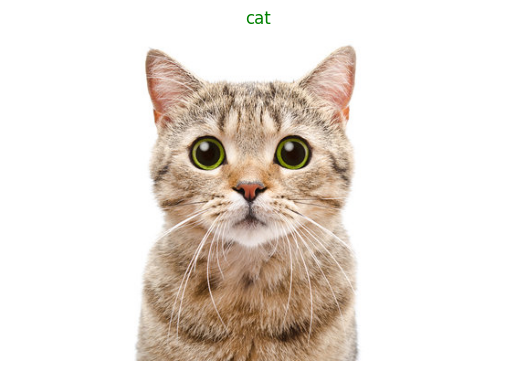

In [85]:
import matplotlib.pyplot as plt

plt.imshow(custom_image.permute(1, 2, 0))
color = "green" if classes[predicted] == "cat" else "red"
plt.title(label="cat", color=color)
plt.axis(False)
plt.show()